In [7]:
import numpy as np
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
X, y = load_diabetes(return_X_y=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
)

In [10]:
from sklearn.linear_model import Ridge, LinearRegression

In [11]:
l2_norm = Ridge(alpha=0.001)
lr      = LinearRegression()

In [12]:
l2_norm.fit(X_train, y_train)
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
l2_norm.score(X_test, y_test)

0.4534280301019319

In [14]:
lr.score(X_test, y_test)

0.45260276297191937

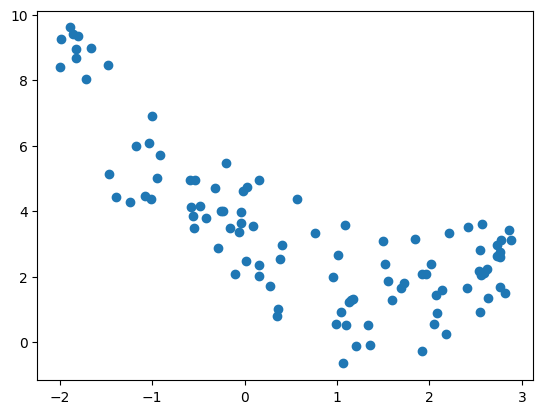

In [15]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
)

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly = PolynomialFeatures(degree=30, include_bias=False)

In [19]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

In [20]:
l2_norm = Ridge(alpha=8.497534359086455)
lr      = LinearRegression()

In [21]:
l2_norm.fit(X_train_poly, y_train)
lr.fit(X_train_poly, y_train)

LinearRegression()

In [22]:
l2_norm.score(X_test_poly, y_test)

0.7399661438792058

In [23]:
lr.score(X_test_poly, y_test)

0.8197804047666042

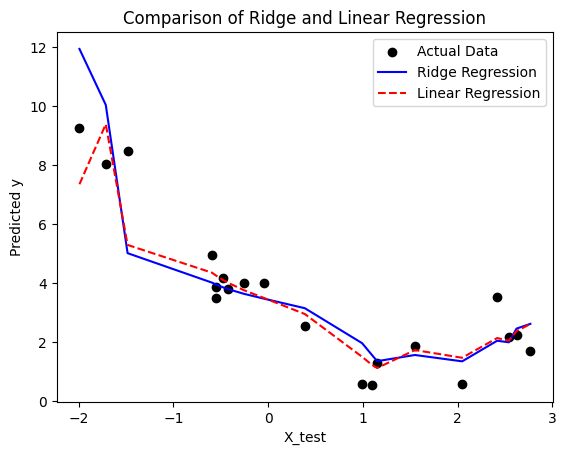

In [24]:
y_pred_ridge = l2_norm.predict(X_test_poly)
y_pred_linear = lr.predict(X_test_poly)

# Ensure X_test is a 1D array (flatten if needed)
X_test_flat = X_test.ravel()

# Sort indices based on X_test values
sorted_indices = np.argsort(X_test_flat)

# Apply sorting to X_test and predictions
X_sorted = X_test_flat[sorted_indices]
ridge_sorted = y_pred_ridge[sorted_indices]
linear_sorted = y_pred_linear[sorted_indices]

# Plot actual data
plt.scatter(X_test_flat, y_test, color='black', label='Actual Data')

# Plot Ridge Regression predictions
plt.plot(X_sorted, ridge_sorted, color='blue', label='Ridge Regression')

# Plot Linear Regression predictions
plt.plot(X_sorted, linear_sorted, color='red', linestyle='dashed', label='Linear Regression')

# Labels and legend
plt.xlabel("X_test")
plt.ylabel("Predicted y")
plt.legend()
plt.title("Comparison of Ridge and Linear Regression")
plt.show()

In [25]:
from sklearn.linear_model import RidgeCV

In [26]:
alphas = np.logspace(-4, 4, 100)  # Try values from 10⁻⁴ to 10⁴
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_poly, y_train)

best_alpha = ridge_cv.alpha_
print(f"Optimal alpha: {best_alpha}")

Optimal alpha: 138.48863713938746


/home/theorist/Envs/ML-venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
